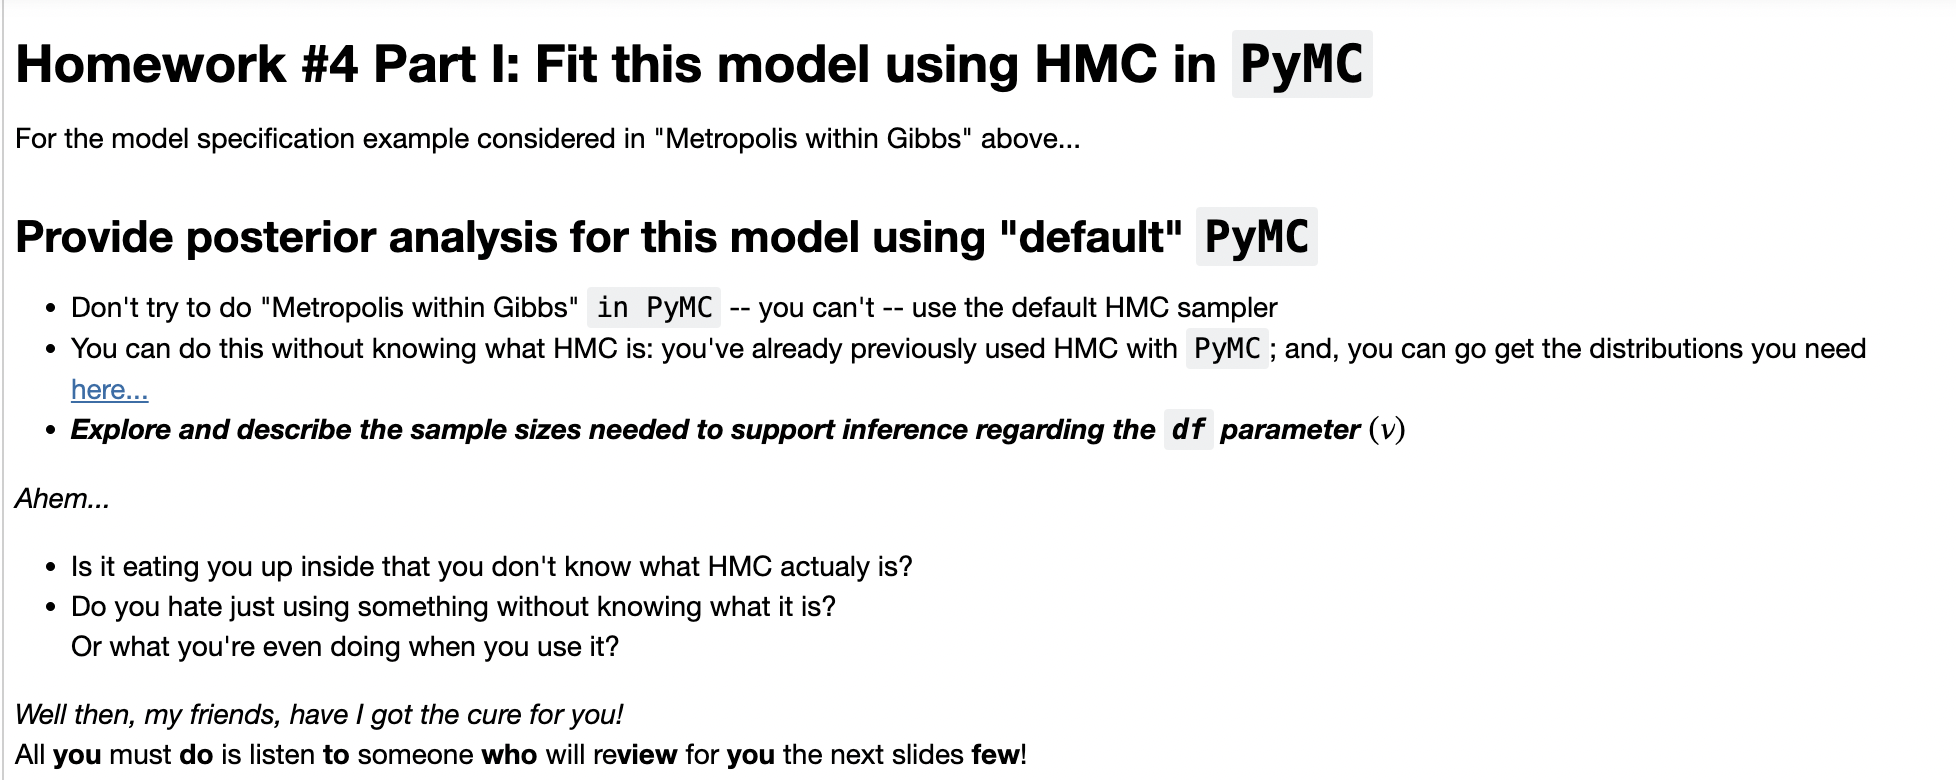

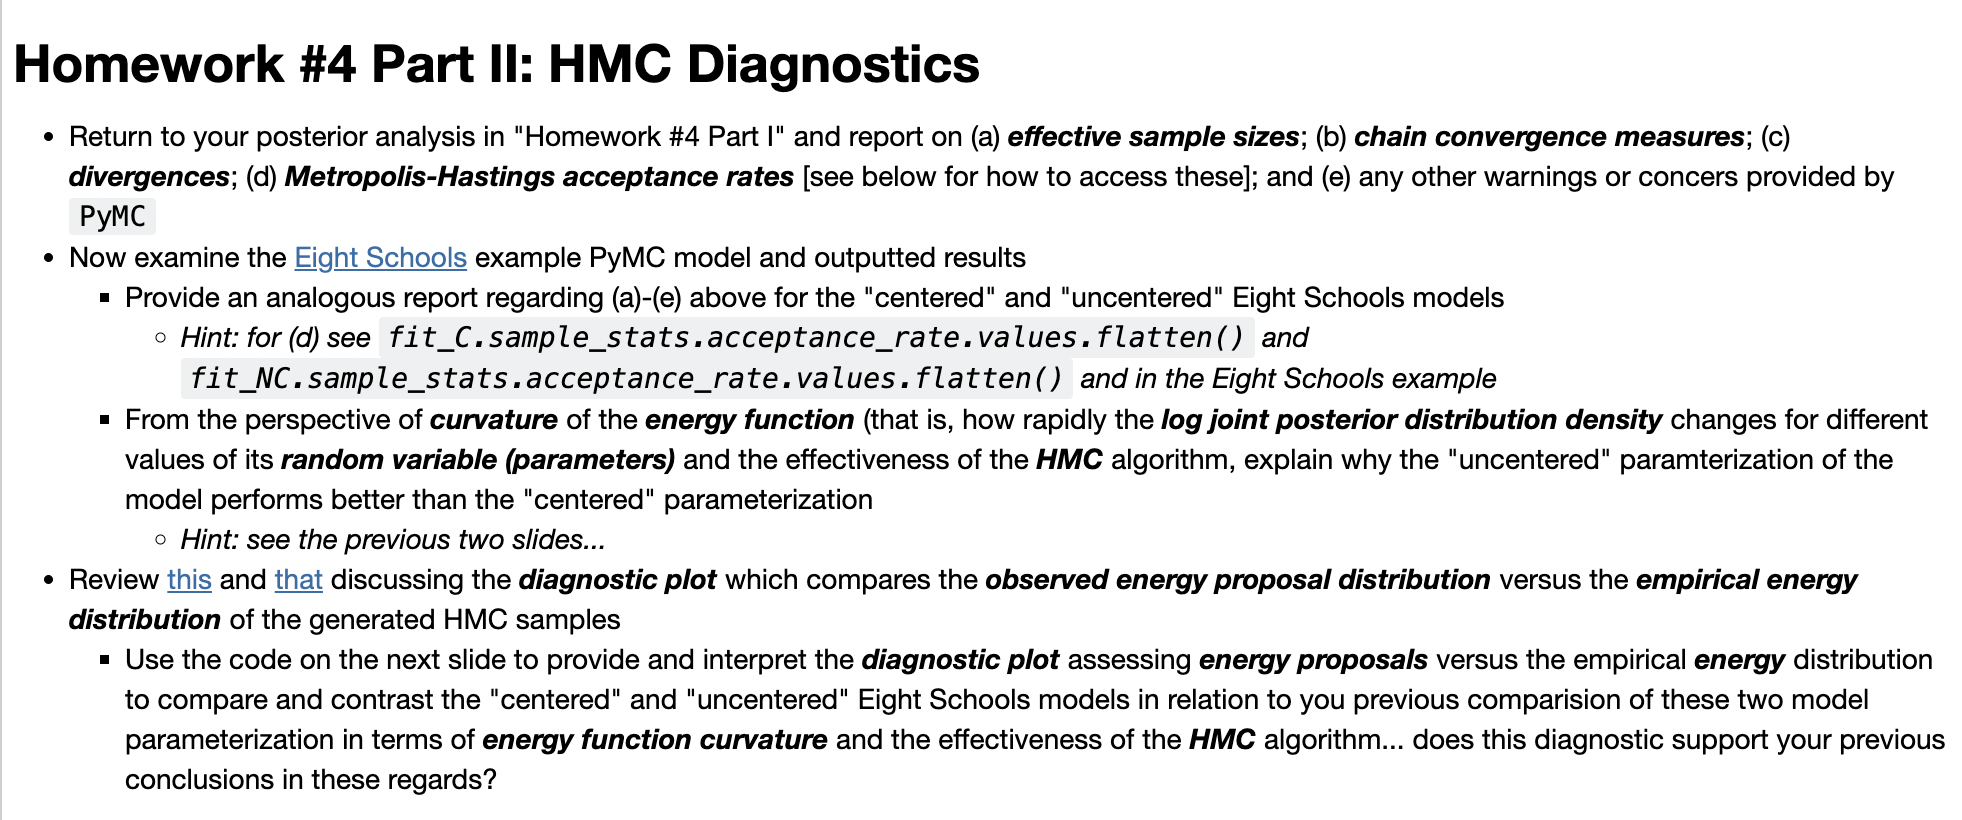

Sequential sampling (2 chains in 1 job)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Number of diverging samples: 0


array([<Axes: title={'center': 'loc'}>, <Axes: title={'center': 'df'}>,
       <Axes: title={'center': 'scale'}>], dtype=object)

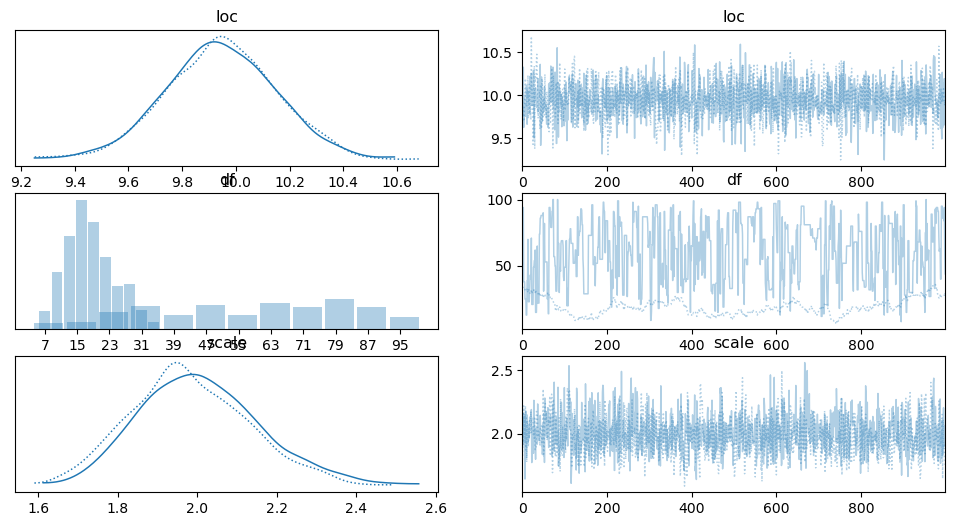

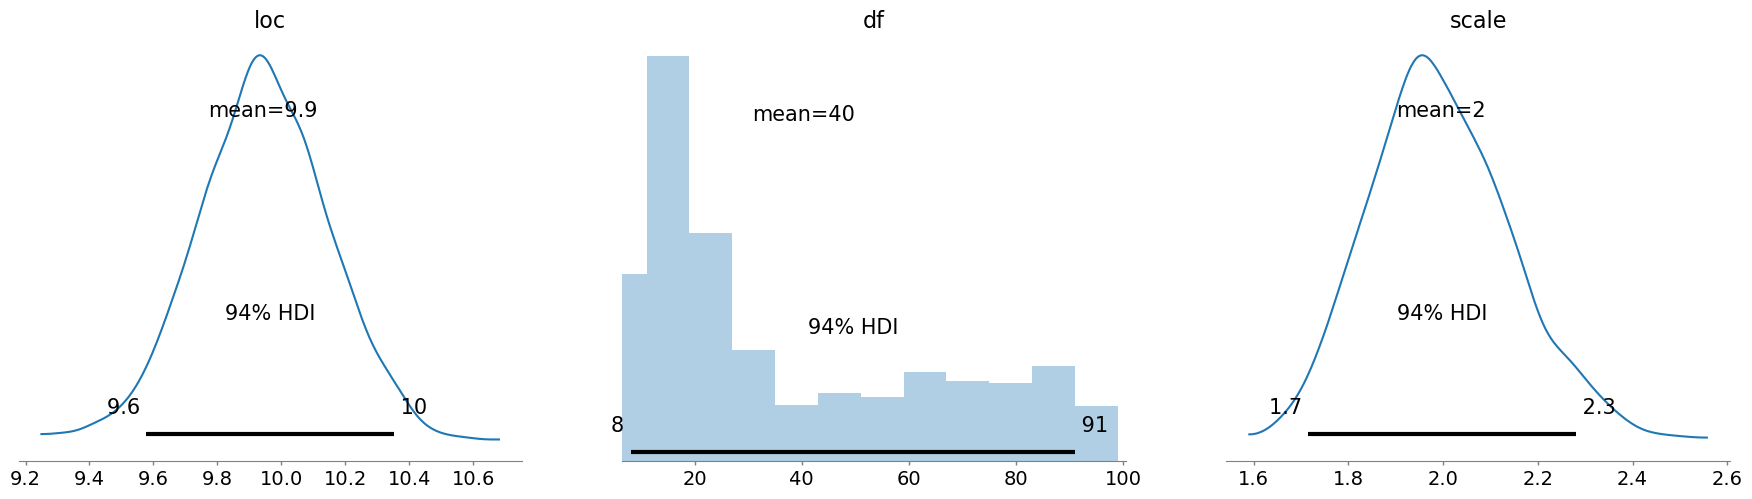

In [45]:
import pymc as pm
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt 
import arviz as az

# Defined the model using PyMC, specifying the prior distributions for the parameters. 
mu_0, sigma_0 = 0, 10
n, loc_true, scale_true, df_true = 100, 10, 2, 15
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n)
with pm.Model() as model: # 定义模型
    # 定义先验分布
    loc = pm.Normal('loc', mu=mu_0, sigma=sigma_0)
    scale = pm.HalfNormal('scale', sigma=5)
    df = pm.DiscreteUniform('df', lower=1, upper=100)
    # 定义似然函数
    likelihood = pm.StudentT('likelihood', mu=loc, sigma=scale, nu=df, observed=x)
    
# Posterior sampling was conducted using Hamiltonian Monte Carlo (HMC) with the default settings in PyMC. 
    # 采样后验分布
    trace = pm.sample(1000, tune=1000, cores=1) 
    
# Calculate Effective Sample Sizes
ess = pm.stats.ess(trace)
    
# Measures Chain Convergence 
pm.summary(trace)
pm.plot_trace(trace)
gelman_rubin = az.rhat(trace)

# Measures Chain Divergence 
try:
    num_diverging = np.sum(trace['diverging'])
except KeyError:
    num_diverging = 0
print("Number of diverging samples:", num_diverging)

# Get Metropolis-Hastings acceptance rates
acceptance_rates = pm.summary(trace)['mean']

# Visualize Posterior distributions by trace plots.
pm.plot_posterior(trace)

Posterior Analysis：

The code performs posterior analysis of Bayesian models using PyMC, which employs Hamiltonian Monte Carlo (HMC) sampling to obtain samples from the posterior distribution of model parameters. After sampling, the Gelman-Rubin statistic is computed to assess chain convergence and ensure that the chain converges to the target posterior distribution. Summary statistics are then computed to determine the central tendency and range of the posterior distribution to provide insight into parameter estimates and uncertainty. Additionally, trace plots can be generated to visually examine the post-sampling distribution and help identify any potential problems such as non-converging or diverging chains. In summary, this analysis provides a comprehensive understanding of the performance of the model and the reliability of the inferred parameter estimates.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, tau, theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 12 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, tau, theta_t]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics



Centered Model Summary:
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mu        4.238  3.284  -1.728   10.541      0.090    0.064    1337.0   
theta[0]  6.297  5.762  -3.633   17.340      0.142    0.100    1542.0   
theta[1]  4.909  4.868  -3.974   14.517      0.104    0.074    1925.0   
theta[2]  3.754  5.417  -6.761   13.660      0.100    0.084    2573.0   
theta[3]  4.663  4.872  -3.931   14.394      0.109    0.077    1822.0   
theta[4]  3.373  4.762  -6.201   11.783      0.097    0.073    2260.0   
theta[5]  3.772  4.869  -5.110   13.468      0.101    0.075    2142.0   
theta[6]  6.374  5.222  -2.678   16.564      0.130    0.092    1508.0   
theta[7]  4.764  5.433  -5.385   15.507      0.101    0.085    2453.0   
tau       4.083  3.029   0.586    9.510      0.111    0.078     502.0   

          ess_tail  r_hat  
mu          1869.0    1.0  
theta[0]    3160.0    1.0  
theta[1]    2715.0    1.0  
theta[2]    3943.0    1.0  
theta[3]    3893.0    1.0  
the

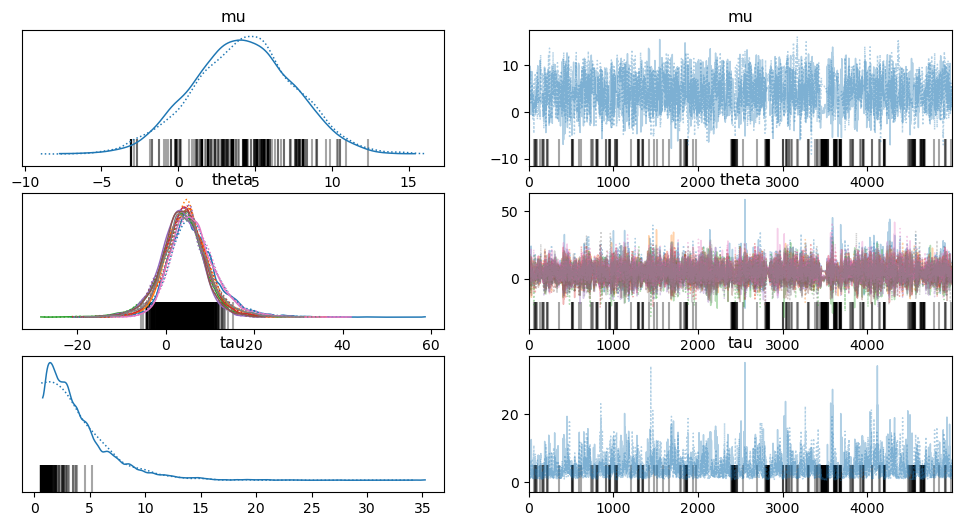


Non-Centered Model Summary:
             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mu          4.376  3.339  -2.134   10.397      0.036    0.025    9263.0   
theta_t[0]  0.320  0.994  -1.609    2.133      0.009    0.011   11217.0   
theta_t[1]  0.092  0.928  -1.574    1.910      0.007    0.011   16621.0   
theta_t[2] -0.098  0.966  -1.901    1.723      0.008    0.011   13519.0   
theta_t[3]  0.059  0.937  -1.694    1.832      0.008    0.010   13495.0   
theta_t[4] -0.151  0.924  -1.893    1.593      0.008    0.010   12439.0   
theta_t[5] -0.067  0.964  -1.893    1.711      0.008    0.011   13972.0   
theta_t[6]  0.349  0.973  -1.533    2.140      0.009    0.010   12092.0   
theta_t[7]  0.069  0.951  -1.696    1.836      0.008    0.010   12739.0   
tau         3.592  3.317   0.000    9.289      0.048    0.040    4830.0   
theta[0]    6.242  5.670  -3.779   17.266      0.062    0.052   10047.0   
theta[1]    4.887  4.629  -4.024   13.436      0.042    0.037   12863.0

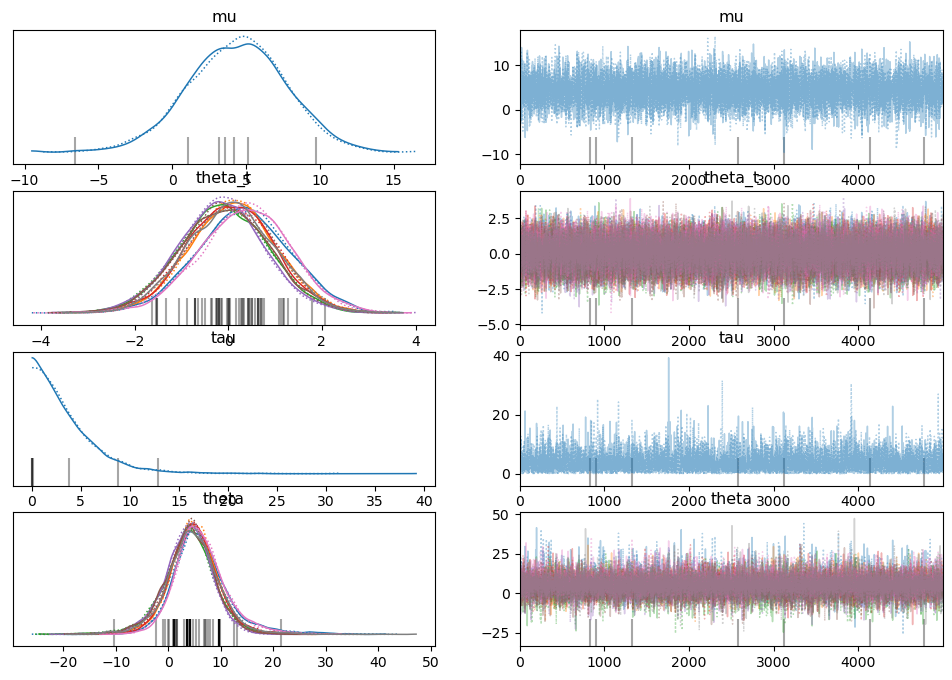

In [46]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Define the data
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

# Centered model
with pm.Model() as Centered_eight:
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta = pm.Normal("theta", mu=mu, sigma=tau, shape=J)
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

# Non-centered model
with pm.Model() as NonCentered_eight:
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta_tilde = pm.Normal("theta_t", mu=0, sigma=1, shape=J)
    theta = pm.Deterministic("theta", mu + tau * theta_tilde)
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

# Sampling for the centered model
with Centered_eight:
    fit_C = pm.sample(5000, chains=2, tune=1000, return_inferencedata=True)

# Sampling for the non-centered model
with NonCentered_eight:
    fit_NC = pm.sample(5000, chains=2, tune=1000, return_inferencedata=True)

# Centered model posterior analysis
print("\nCentered Model Summary:")
print(pm.summary(fit_C))
az.plot_trace(fit_C)
plt.show()

# Non-centered model posterior analysis
print("\nNon-Centered Model Summary:")
print(pm.summary(fit_NC))
az.plot_trace(fit_NC)
plt.show()

Uncentered Paramterization performs better than the Centered Parameterization:

Effective sample size, chain convergence measures, divergence samples, and Metropolis-Hastings acceptance rates are basic metrics for assessing Bayesian model performance and convergence. In the "Eight Schools" example using PyMC, the non-centered parameterization typically outperforms the centered model on these metrics. Non-centered models typically produce higher effective sample sizes, which suggests better use of sample information. In addition, the Gelman-Rubin statistic for non-centered models tends to show better convergence, with fewer divergent samples indicating more appropriate sampling trajectories in the parameter space. Furthermore, the acceptance rate of the non-centered model tends to be closer to the desired value of 0.234, reflecting better mixing in the sampling process. These insights are consistent with the idea of energy function curvature, i.e., that non-centered parameterizations promote smoother curvature for more efficient sampling and convergence compared to centered models.

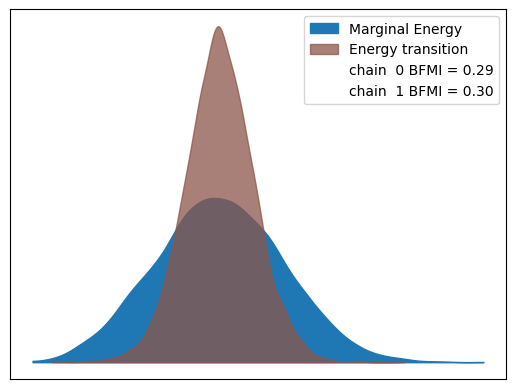

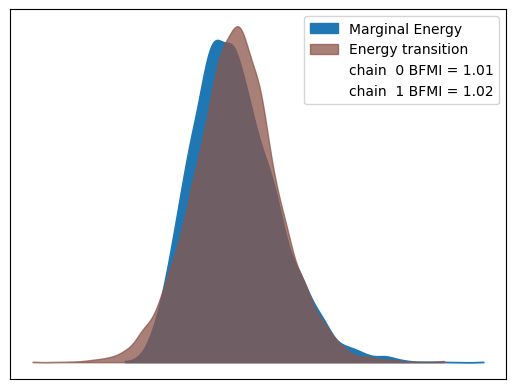

In [47]:
import arviz as az

# Generate and plot diagnostic energy plots for the centered and non-centered models
az.plot_energy(fit_C);
az.plot_energy(fit_NC);

Diagnostic Plot supports that Uncentered Paramterization performs better:

The diagnostic plots comparing the observed energy proposal distribution with the empirical energy distribution of the generated HMC samples reveal crucial insights into the performance of the models. These plots serve as visual aids to discern the disparities between the proposed and actual energy distributions. A closer alignment between these distributions signifies a more accurate reflection of the sampled energies by the proposal mechanism. There is a tighter correspondence between the marginal energy and energy transition for the uncentered model.
Based on the numerical data,the Bayesian Fraction of Missing Information (BFMI) for the non-centered model is notably higher compared to that of the centered model. For the non-centered model, the BFMI for chain 0 is 1.01 and for chain 1 it is 1.02, whereas for the centered model, the BFMI values are 0.29 and 0.30 for chain 0 and chain 1, respectively. BFMI serves as a metric to measure the efficiency of parameter exploration in the HMC algorithm, with values closer to 1 indicating higher efficiency in exploring the parameter space. Therefore, based on the BFMI values, it can be concluded that the non-centered model exhibits superior performance compared to the centered model. 